
# MLOPS Assignment 1

# BITS WILP SEM 3 Group ID: 29

<table border="1" style="border-collapse: collapse; width: 60%;">
  <tr>
    <th>Name</th>
    <th>Student ID</th>
    <th>Contribution</th>
  </tr>
  <tr>
    <td>Vikram</td>
    <td>2024AB05100</td>
    <td>100%</td>
  </tr>
  <tr>
    <td>R Nishanth</td>
    <td>2024AA05994</td>
    <td>100%</td>
  </tr>
  <tr>
    <td>Meera Hari Iyer</td>
    <td>2024AB05097</td>
    <td>100%</td>
  </tr>
  <tr>
    <td>Ramesh N</td>
    <td>2024AB05049</td>
    <td>100%</td>
  </tr>
  <tr>
    <td>Nishanth V</td>
    <td>2024AA05920</td>
    <td>100%</td>
  </tr>
</table>

# Problem Statement

MLOps Experimental Learning Assignment: End-to-End ML Model Development, CI/CD, and Production Deployment Experimental Learning                                                                  

Objective:  
Design, develop, and deploy a scalable and reproducible machine learning solution utilising modern MLOps best practices. The assignment emphasises practical automation, experiment tracking, CI/CD pipelines, containerization, cloud deployment, and monitoring—mirroring real-world production
scenarios.

Dataset: Title: Heart Disease UCI Dataset
Source: UCI Machine Learning Repository
• CSV containing 14+ features (age, sex, blood pressure, cholesterol, etc.) and a binary target (presence/absence of heart disease).
Problem Statement: Build a machine learning classifier to predict the risk of heart disease based on patient health data, and deploy the solution as a cloud-ready, monitored API.

# Problem Part 1: Data Acquisition & Exploratory Data Analysis (EDA) [5 marks]

Obtain the dataset (provide download script or instructions). Clean and preprocess the data (handle
missing values, encode features). Perform EDA with professional visualizations (histograms, correlation
heatmaps, class balance).

# 1.1 Environment & Reproducibility

Reproducibility is core to MLOps. We fix seeds, verify Python path, and ensure libraries are installed in the active Jupyter kernel.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Reproducibility & environment checks
import sys, os, random
import numpy as np
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Change working directory
new_working_dir = '/content/gdrive/MyDrive/Mlops/Assignmentgrp29'
if os.path.exists(new_working_dir) and os.path.isdir(new_working_dir):
    os.chdir(new_working_dir)
    print(f"Working directory changed to: {os.getcwd()}")
else:
    print(f"Error: Directory '{new_working_dir}' does not exist or is not a directory.")

print("Python executable:", sys.executable)
print("Working dir:", os.getcwd())

Working directory changed to: /content/gdrive/MyDrive/Mlops/Assignmentgrp29
Python executable: /usr/bin/python3
Working dir: /content/gdrive/MyDrive/Mlops/Assignmentgrp29


# 1.2 Imports & Project Paths

In [3]:
import requests
from pathlib import Path

# URL of the cleveland.data file
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Define a Colab-compatible base directory and raw data path
COLAB_BASE_DIR = Path(new_working_dir)
COLAB_RAW_DIR = COLAB_BASE_DIR / "Data"
# Changed to store directly in 'Data' folder
COLAB_RAW_FILE_PATH = COLAB_RAW_DIR / "processed.cleveland.data"

# Create the directory if it doesn't exist
COLAB_RAW_DIR.mkdir(parents=True, exist_ok=True)

print(f"Downloading {DATA_URL} to {COLAB_RAW_FILE_PATH}...")

try:
    response = requests.get(DATA_URL)
    response.raise_for_status() # Raise an exception for bad status codes

    with open(COLAB_RAW_FILE_PATH, 'wb') as f:
        f.write(response.content)
    print("Download complete!")
except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Download complete!


In [4]:
import os
import shutil
from pathlib import Path

source_file_path = Path('/content/gdrive/MyDrive/Mlops/Assignmentgrp29/Data/processed.cleveland.data')
destination_dir = Path('/content/gdrive/MyDrive/Mlops/Assignmentgrp29/Data/raw')

if not source_file_path.exists():
    print(f"Error: Source file '{source_file_path}' does not exist.")
elif not destination_dir.exists():
    print(f"Destination directory '{destination_dir}' does not exist. Creating it...")
    destination_dir.mkdir(parents=True, exist_ok=True)
    try:
        shutil.move(source_file_path, destination_dir)
        print(f"Successfully moved '{source_file_path.name}' to '{destination_dir}'")
    except Exception as e:
        print(f"Error moving file: {e}")
elif not destination_dir.is_dir():
    print(f"Error: Destination path '{destination_dir}' exists but is not a directory.")
else:
    try:
        shutil.move(source_file_path, destination_dir)
        print(f"Successfully moved '{source_file_path.name}' to '{destination_dir}'")
    except Exception as e:
        print(f"Error moving file: {e}")

Destination directory '/content/gdrive/MyDrive/Mlops/Assignmentgrp29/Data/raw' does not exist. Creating it...
Successfully moved 'processed.cleveland.data' to '/content/gdrive/MyDrive/Mlops/Assignmentgrp29/Data/raw'


In [5]:
import sys, os, random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.impute import SimpleImputer
import math
# Style + warnings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
# project layout
BASE_DIR = new_working_dir
# adjust if your notebook runs elsewhere
RAW_PATH = Path(BASE_DIR) / "Data" / "raw" / "processed.cleveland.data"
CLEAN_PATH = Path(BASE_DIR) / "Data" / "processed" / "heart_disease_cleveland_clean.csv"
# Fixed unterminated string literal
FIG_DIR = Path(BASE_DIR) / "Reports" / "figures"
for p in [RAW_PATH.parent, CLEAN_PATH.parent, FIG_DIR]:
 p.mkdir(parents=True, exist_ok=True)
print("Raw exists:", RAW_PATH.exists(), "->", RAW_PATH)

Raw exists: True -> /content/gdrive/MyDrive/Mlops/Assignmentgrp29/Data/raw/processed.cleveland.data


# 1.3 Data Dictionary & Target Definition

UCI Cleveland has 14 attributes; num is 0–4; we binarize to 0/1 for “no disease” vs. “disease present”.

# 1.4 Data Dictionary & Target
- Columns (per UCI docs): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, ,slope, ca, thal, num.
- Target: `num`  {0,1,2,3,4}; we convert to `target`  {0,1}, where 0  no disease, 1  presence of disease.
- Missing values are encoded as `"?"` or `-9` in some files; we impute (median for numeric, mot frequent for categorical).

# 1.5 Data Loading Helper

A small loader function provides a clean seam for unit tests and pipeline reuse.

In [6]:
COLS = [
    'age','sex','cp','trestbps','chol','fbs','restecg','thalach',
    'exang','oldpeak','slope','ca','thal','num'
]
NUMERIC_COLS = ['age','trestbps','chol','thalach','oldpeak','ca']
CATEGORICAL_COLS = ['sex','cp','fbs','restecg','exang','slope','thal']
TARGET_COL = 'target'

def load_raw(path: Path) -> pd.DataFrame:
    if not path.exists():
        raise FileNotFoundError(f"Raw file not found at {path}. Please place 'processed.cleveland.data' there.")
    df = pd.read_csv(path, header=None, names=COLS, na_values=['?','-9'])
    return df

df_raw = load_raw(RAW_PATH)
df_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# 1.6 Preprocessing

Convert num → binary target; ensure dtypes; impute missing values.

In [7]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    # binarize target
    df[TARGET_COL] = (df['num'] > 0).astype(int)
    df = df.drop(columns=['num'])
    # enforce numeric dtypes
    for c in NUMERIC_COLS:
        df[c] = pd.to_numeric(df[c], errors='coerce')
    for c in CATEGORICAL_COLS:
        df[c] = pd.to_numeric(df[c], errors='coerce')  # categorical codes are numeric-coded
    # imputation
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df_num = pd.DataFrame(num_imputer.fit_transform(df[NUMERIC_COLS]), columns=NUMERIC_COLS)
    df_cat = pd.DataFrame(cat_imputer.fit_transform(df[CATEGORICAL_COLS]), columns=CATEGORICAL_COLS)
    clean_df = pd.concat([df_num, df_cat, df[TARGET_COL]], axis=1)
    return clean_df

df = preprocess(df_raw)
df.to_csv(CLEAN_PATH, index=False)
CLEAN_PATH

PosixPath('/content/gdrive/MyDrive/Mlops/Assignmentgrp29/Data/processed/heart_disease_cleveland_clean.csv')

#  1.7 EDA – Class Balance

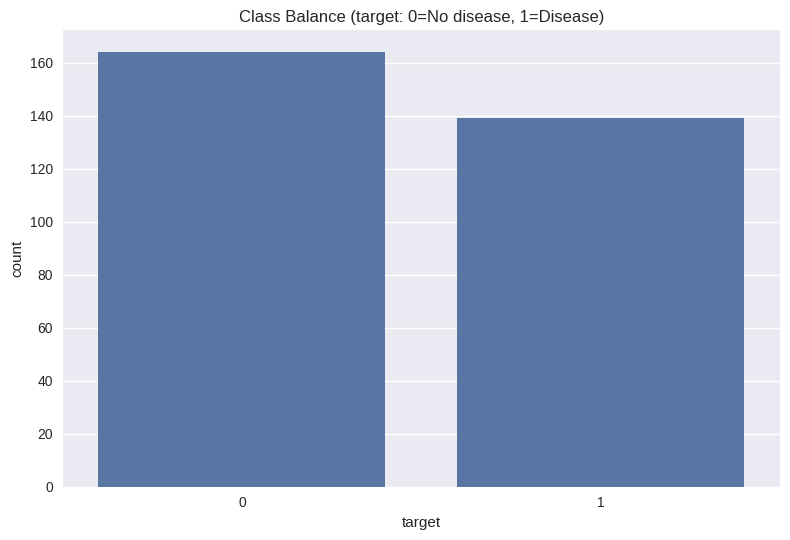

In [8]:
sns.countplot(x=TARGET_COL, data=df)
plt.title("Class Balance (target: 0=No disease, 1=Disease)")
plt.tight_layout()
plt.show()

plt.savefig(FIG_DIR / 'class_balance.png', dpi=150); plt.close()

# 1.8 EDA - Numeric Distributions

Histograms show central tendency, spread, and potential outliers.

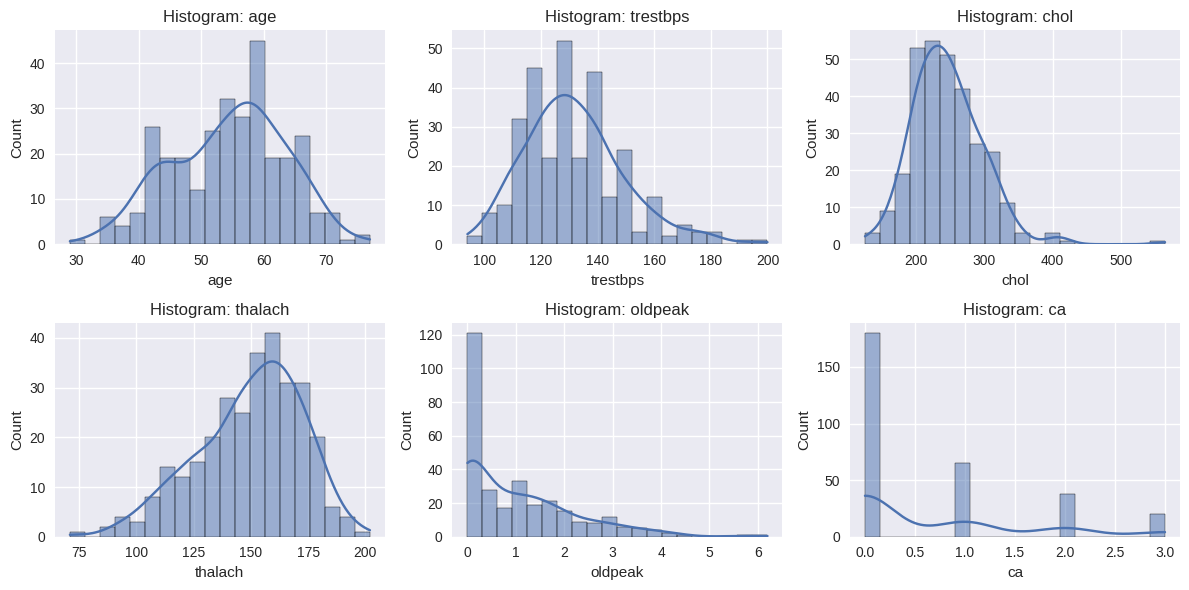

In [9]:
n = len(NUMERIC_COLS); cols = 3; rows = math.ceil(n/cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
axes = axes.flatten()

for i, c in enumerate(NUMERIC_COLS):
    sns.histplot(df[c], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Histogram: {c}')

for j in range(i+1, len(axes)):
    axes[j].axis('off')
fig.tight_layout()
plt.show()

fig.savefig(FIG_DIR / 'numeric_histograms.png', dpi=150); plt.close(fig)

In [10]:
COLS = [
    'age','sex','cp','trestbps','chol','fbs','restecg','thalach',
    'exang','oldpeak','slope','ca','thal','num'
]
NUMERIC_COLS = ['age','trestbps','chol','thalach','oldpeak','ca']
CATEGORICAL_COLS = ['sex','cp','fbs','restecg','exang','slope','thal']
TARGET_COL = 'target'

RAW_PATH = Path('data/raw/processed.cleveland.data')
CLEAN_PATH = Path('data/processed/heart_disease_cleveland_clean.csv')
FIG_DIR = Path('reports/figures')

# 1.9 EDA - Categorical Counts

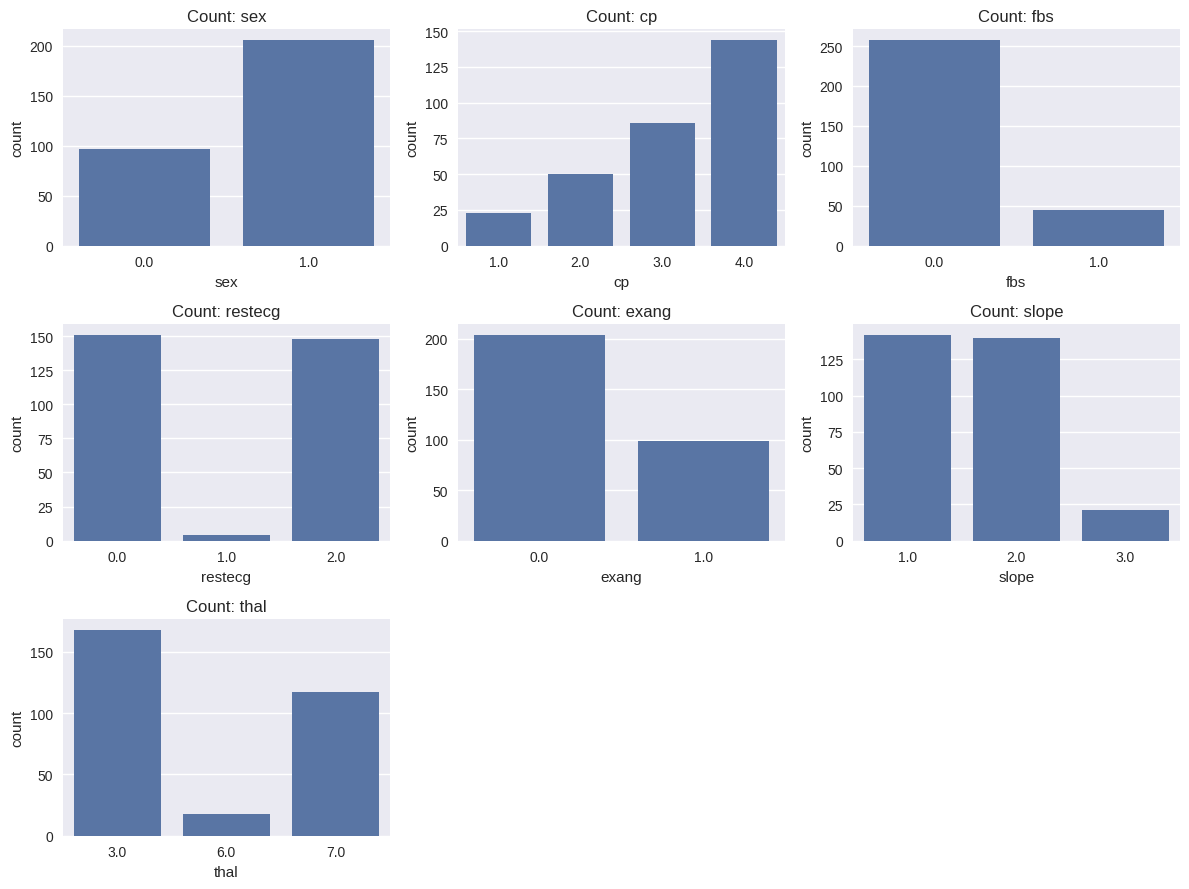

In [11]:
FIG_DIR = Path(BASE_DIR) / "Reports" / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

n = len(CATEGORICAL_COLS); cols = 3; rows = math.ceil(n/cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
axes = axes.flatten()

for i, c in enumerate(CATEGORICAL_COLS):
    sns.countplot(x=c, data=df, ax=axes[i])
    axes[i].set_title(f'Count: {c}')

for j in range(i+1, len(axes)):
    axes[j].axis('off')
fig.tight_layout()
plt.show()

fig.savefig(FIG_DIR / 'categorical_countplots.png', dpi=150); plt.close(fig)

# 1.10 EDA - Correlation Heatmap + Key Bivariate

Heatmap shows linear relationships; boxplots check distributions vs. target.

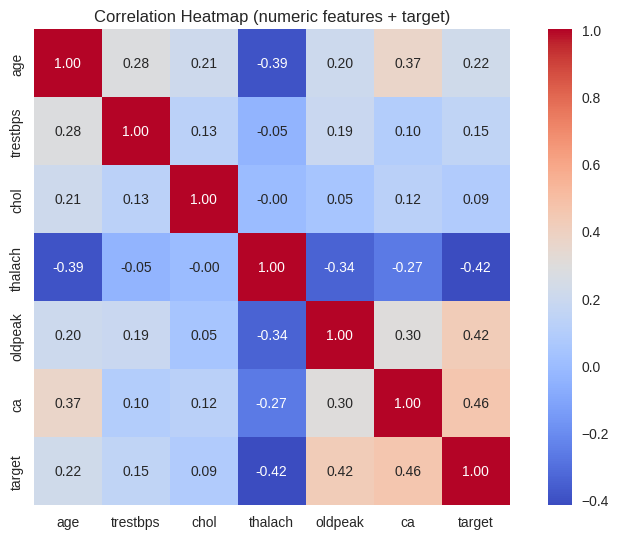

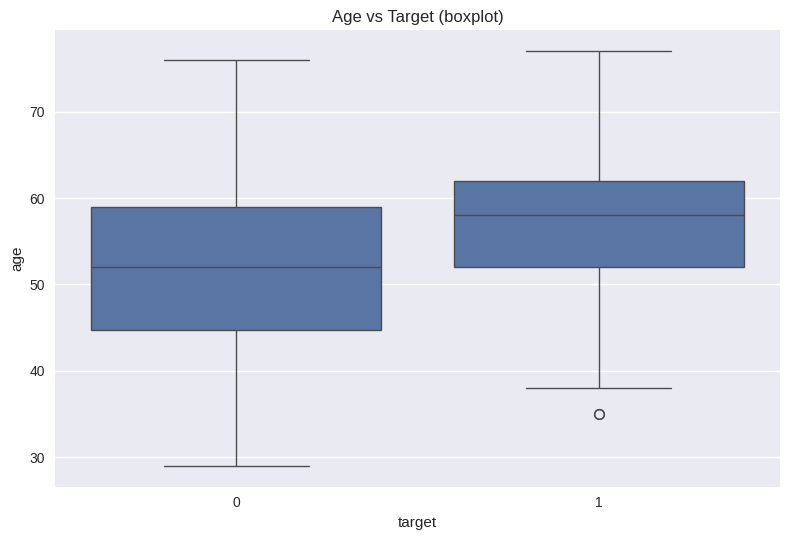

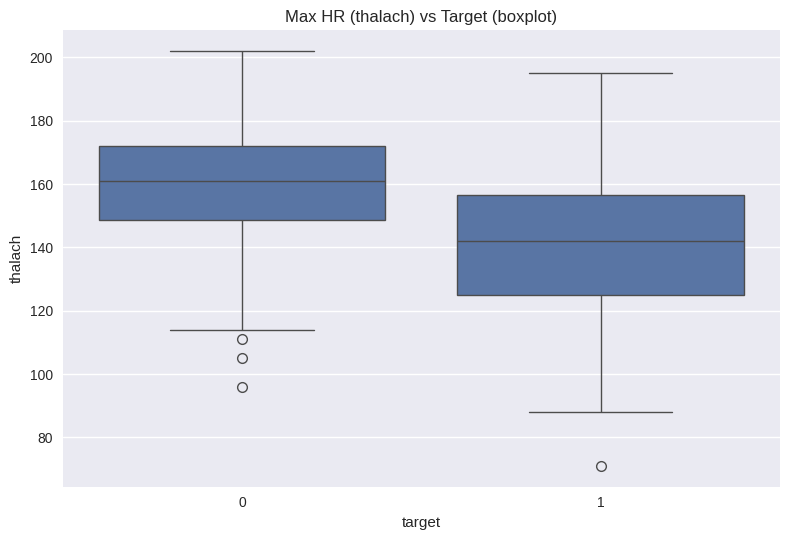

In [12]:
corr = df[NUMERIC_COLS + [TARGET_COL]].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Heatmap (numeric features + target)")
plt.tight_layout()
plt.show()
plt.savefig(FIG_DIR / 'correlation_heatmap.png', dpi=150); plt.close()

# Bivariate: age vs target
sns.boxplot(x=TARGET_COL, y='age', data=df)
plt.title('Age vs Target (boxplot)')
plt.tight_layout(); plt.show()
plt.savefig(FIG_DIR / 'age_vs_target_box.png', dpi=150); plt.close()

# Bivariate: thalach vs target
sns.boxplot(x=TARGET_COL, y='thalach', data=df)
plt.title('Max HR (thalach) vs Target (boxplot)')
plt.tight_layout(); plt.show()
plt.savefig(FIG_DIR / 'thalach_vs_target_box.png', dpi=150); plt.close()

# Problem Part 2: Feature Engineering & Model Development

Prepare the final ML features (scaling and encoding). Build and train at least two classification models (e.g., Logistic Regression and Random Forest). Document model selection and tuning process. Evaluate using cross-validation and relevant metrics (accuracy, precision, recall, ROC-AUC).

# 2.1 Imports, Paths & Reproducibility

In [13]:
# 2.1 Imports, Paths & Reproducibility
import os, json, random, math
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate, cross_val_predict
from sklearn.metrics import (accuracy_score, precision_score, recall_score, roc_auc_score,
                             roc_curve, confusion_matrix, classification_report)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from joblib import dump

# Pretty printing helpers
def print_cv_summary(title, summary_dict):
    df = (pd.DataFrame(summary_dict)
            .T.rename(columns={0:'mean',1:'std'})
            .applymap(lambda x: f"{x:.3f}" if isinstance(x, (float, np.floating)) else x))
    display(pd.DataFrame({title: []}))  # header divider
    display(df)

def plot_cm(cm, title, fname=None):
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title); plt.xlabel('Predicted'); plt.ylabel('Actual')
    plt.tight_layout()
    if fname: plt.savefig(fname, dpi=150)
    plt.show(); plt.close()

# Style + warnings + reproducibility
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
new_working_dir = '/content/gdrive/MyDrive/Mlops/Assignmentgrp29'
BASE_DIR=new_working_dir
DATA_PATH  = Path(BASE_DIR) / "Data" / "processed" / "heart_disease_cleveland_clean.csv"
FIG_DIR    = Path(BASE_DIR) / "Reports" / "figures"
METRICS_DIR= Path(BASE_DIR) / "Reports" / "metrics"
MODEL_DIR  = Path(BASE_DIR) / "models"

for p in [FIG_DIR, METRICS_DIR, MODEL_DIR]:
    p.mkdir(parents=True, exist_ok=True)

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

print("Data file exists:", DATA_PATH.exists(), "->", DATA_PATH)

Data file exists: True -> /content/gdrive/MyDrive/Mlops/Assignmentgrp29/Data/processed/heart_disease_cleveland_clean.csv


# 2.2 Load Cleaned Data & Define Feature Sets

Load your cleaned dataset; identify numeric/categorical features; set the target.

In [14]:
## 2.2 Load Cleaned Data & Define Features
df = pd.read_csv(DATA_PATH)

NUMERIC_COLS = ['age','trestbps','chol','thalach','oldpeak','ca']
CATEGORICAL_COLS = ['sex','cp','fbs','restecg','exang','slope','thal']
TARGET_COL = 'target'

X = df[NUMERIC_COLS + CATEGORICAL_COLS].copy()
y = df[TARGET_COL].copy()

print(f"Shape: {X.shape} | Positives: {int(y.sum())} | Negatives: {int((y==0).sum())}")
df.head(3)

Shape: (303, 13) | Positives: 139 | Negatives: 164


,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal,target
0,63.0,145.0,233.0,150.0,2.3,0.0,1.0,1.0,1.0,2.0,0.0,3.0,6.0,0
1,67.0,160.0,286.0,108.0,1.5,3.0,1.0,4.0,0.0,2.0,1.0,2.0,3.0,1
2,67.0,120.0,229.0,129.0,2.6,2.0,1.0,4.0,0.0,2.0,1.0,2.0,7.0,1


# 2.3 Build the Preprocessing Pipeline

Scale numeric features; one‑hot encode categorical features; handle missing values in one reproducible ColumnTransformer to prevent leakage in CV.

In [15]:
## 2.3 Preprocessing (scaling + encoding + imputation)
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, NUMERIC_COLS),
        ('cat', categorical_pipeline, CATEGORICAL_COLS)
    ], remainder='drop'
)

# 2.4 Define Models & Hyperparameter Grids
We’ll try Logistic Regression (strong linear baseline) and Random Forest (nonlinear ensemble). Use class weights to handle mild class imbalance and tune hyperparameters with CV

In [16]:
## 2.4 Define Models & Hyperparameter Grids
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced',
                             random_state=SEED, max_iter=1000)
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced',
                            random_state=SEED, n_jobs=-1)

pipe_lr = Pipeline([('prep', preprocessor), ('clf', log_reg)])
pipe_rf = Pipeline([('prep', preprocessor), ('clf', rf)])

param_grid_lr = {
    'clf__C': [0.1, 0.5, 1.0, 2.0, 5.0],
    'clf__penalty': ['l1','l2']
}
param_grid_rf = {
    'clf__n_estimators': [200, 400, 600],
    'clf__max_depth': [None, 5, 10, 15],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

log_reg = LogisticRegression(solver='liblinear', class_weight='balanced',
                             random_state=SEED, max_iter=1000)
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced',
                            random_state=SEED, n_jobs=-1)

pipe_lr = Pipeline([('prep', preprocessor), ('clf', log_reg)])
pipe_rf = Pipeline([('prep', preprocessor), ('clf', rf)])

param_grid_lr = {
    'clf__C': [0.1, 0.5, 1.0, 2.0, 5.0],
    'clf__penalty': ['l1','l2']
}
param_grid_rf = {
    'clf__n_estimators': [200, 400, 600],
    'clf__max_depth': [None, 5, 10, 15],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# 2.5 Hyperparameter Tuning via GridSearchCV on ROC-AUC
Optimize ROC‑AUC (good for medical classification with imbalance) using Stratified 5‑fold CV.

In [17]:
## 2.5 Hyperparameter Tuning (ROC-AUC)
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=cv,
                       scoring='roc_auc', n_jobs=-1, return_train_score=True)
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=cv,
                       scoring='roc_auc', n_jobs=-1, return_train_score=True)

grid_lr.fit(X, y)
grid_rf.fit(X, y)

print("Best LR params:", grid_lr.best_params_, "| Best ROC-AUC:", f"{grid_lr.best_score_:.3f}")
print("Best RF params:", grid_rf.best_params_, "| Best ROC-AUC:", f"{grid_rf.best_score_:.3f}")

Best LR params: {'clf__C': 0.1, 'clf__penalty': 'l2'} | Best ROC-AUC: 0.919
Best RF params: {'clf__max_depth': 5, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 10, 'clf__n_estimators': 200} | Best ROC-AUC: 0.918


# 2.6 Cross‑validated Metrics (Accuracy, Precision, Recall, ROC‑AUC)
Evaluate with stratified CV using best pipelines; report mean ± std across folds. For consistent “out‑of‑fold” predictions, use cross_val_predict for ROC and confusion matrix.

In [18]:
# 2.6 Evaluate via cross_validate (mean ± std metrics)
from IPython.display import display

def evaluate_pipeline_df(pipeline, X, y, cv):
    scoring = ['accuracy','precision','recall','roc_auc']
    cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    # Build a DataFrame with mean and std (converted to float)
    rows = {}
    for m in scoring:
        mean = float(cv_results[f'test_{m}'].mean())
        std  = float(cv_results[f'test_{m}'].std())
        rows[m] = {'mean': mean, 'std': std}
    df = pd.DataFrame(rows).T
    return df

best_lr = grid_lr.best_estimator_
best_rf = grid_rf.best_estimator_

def cv_metrics(pipeline, X, y, cv):
    scoring = ['accuracy','precision','recall','roc_auc']
    res = cross_validate(pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    return {m: (res[f'test_{m}'].mean(), res[f'test_{m}'].std()) for m in scoring}

metrics_lr = cv_metrics(best_lr, X, y, cv)
metrics_rf = cv_metrics(best_rf, X, y, cv)

df_lr = evaluate_pipeline_df(best_lr, X, y, cv)
df_rf = evaluate_pipeline_df(best_rf, X, y, cv)

print("\nLogistic Regression CV (mean/std)")
display(df_lr.style.format({'mean': '{:.3f}', 'std': '{:.3f}'}))

print("\nRandom Forest CV (mean/std)")
display(df_rf.style.format({'mean': '{:.3f}', 'std': '{:.3f}'}))


## Out-of-fold probabilities for ROC/CM
y_proba_lr = cross_val_predict(best_lr, X, y, cv=cv, method='predict_proba', n_jobs=-1)[:,1]
y_pred_lr  = (y_proba_lr >= 0.5).astype(int)
cm_lr = confusion_matrix(y, y_pred_lr)
fpr_lr, tpr_lr, _ = roc_curve(y, y_proba_lr)
roc_auc_lr = roc_auc_score(y, y_proba_lr)

y_proba_rf = cross_val_predict(best_rf, X, y, cv=cv, method='predict_proba', n_jobs=-1)[:,1]
y_pred_rf  = (y_proba_rf >= 0.5).astype(int)
cm_rf = confusion_matrix(y, y_pred_rf)
fpr_rf, tpr_rf, _ = roc_curve(y, y_proba_rf)
roc_auc_rf = roc_auc_score(y, y_proba_rf)

print(f"OOF ROC-AUC: LR={roc_auc_lr:.3f} | RF={roc_auc_rf:.3f}")


Logistic Regression CV (mean/std)


,mean,std
accuracy,0.858,0.034
precision,0.866,0.052
recall,0.820,0.063
roc_auc,0.919,0.021



Random Forest CV (mean/std)


,mean,std
accuracy,0.835,0.029
precision,0.836,0.042
recall,0.798,0.054
roc_auc,0.918,0.017


OOF ROC-AUC: LR=0.917 | RF=0.914


# Plot ROC curves & confusion matrices

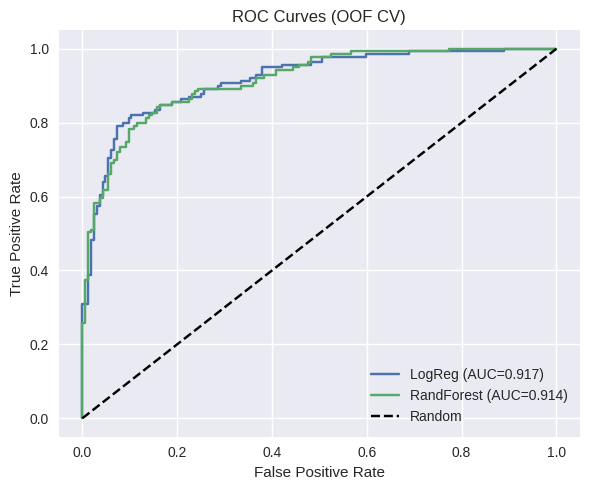

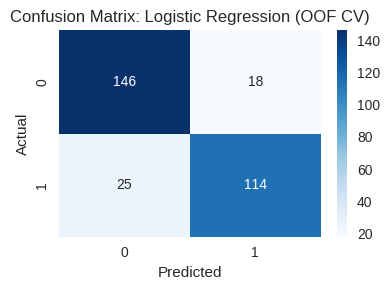

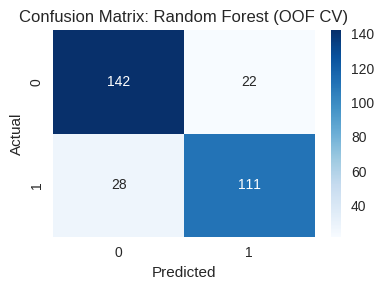


LogReg Classification Report:
               precision    recall  f1-score   support

           0      0.854     0.890     0.872       164
           1      0.864     0.820     0.841       139

    accuracy                          0.858       303
   macro avg      0.859     0.855     0.856       303
weighted avg      0.858     0.858     0.858       303


RandomForest Classification Report:
               precision    recall  f1-score   support

           0      0.835     0.866     0.850       164
           1      0.835     0.799     0.816       139

    accuracy                          0.835       303
   macro avg      0.835     0.832     0.833       303
weighted avg      0.835     0.835     0.835       303



In [19]:
## 2.7 ROC & Confusion Matrices
plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f'LogReg (AUC={roc_auc_lr:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'RandForest (AUC={roc_auc_rf:.3f})')
plt.plot([0,1],[0,1],'k--',label='Random')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curves (OOF CV)')
plt.legend(loc='lower right'); plt.tight_layout()
plt.savefig(FIG_DIR / 'roc_curves_cv.png', dpi=150)
plt.show(); plt.close()

plot_cm(cm_lr, 'Confusion Matrix: Logistic Regression (OOF CV)', FIG_DIR / 'cm_lr_oof.png')
plot_cm(cm_rf, 'Confusion Matrix: Random Forest (OOF CV)', FIG_DIR / 'cm_rf_oof.png')

print("\nLogReg Classification Report:\n", classification_report(y, y_pred_lr, digits=3))
print("\nRandomForest Classification Report:\n", classification_report(y, y_pred_rf, digits=3))

#  Top Features (Coefficients / Importances)

In [20]:
## 2.8 Feature Importance & Coefficients
feature_names = best_lr.named_steps['prep'].get_feature_names_out()

# Logistic Regression coefficients
lr_coef = best_lr.named_steps['clf'].coef_.flatten()
coef_df = pd.DataFrame({'feature': feature_names, 'coef': lr_coef}).sort_values('coef', ascending=False)
display(coef_df.head(10))
display(coef_df.tail(10))

# Random Forest importances
rf_importances = best_rf.named_steps['clf'].feature_importances_
imp_df = pd.DataFrame({'feature': feature_names, 'importance': rf_importances}).sort_values('importance', ascending=False)
display(imp_df.head(10))

,feature,coef
5,num__ca,0.730989
11,cat__cp_4.0,0.632781
24,cat__thal_7.0,0.490756
4,num__oldpeak,0.350549
7,cat__sex_1.0,0.345335
18,cat__exang_1.0,0.290370
20,cat__slope_2.0,0.276496
1,num__trestbps,0.212711
2,num__chol,0.126396
16,cat__restecg_2.0,0.119065


,feature,coef
9,cat__cp_2.0,-0.086389
13,cat__fbs_1.0,-0.088482
14,cat__restecg_0.0,-0.174591
8,cat__cp_1.0,-0.208743
19,cat__slope_1.0,-0.280302
17,cat__exang_0.0,-0.333673
3,num__thalach,-0.344702
10,cat__cp_3.0,-0.380952
6,cat__sex_0.0,-0.388638
22,cat__thal_3.0,-0.481767


,feature,importance
11,cat__cp_4.0,0.137037
5,num__ca,0.124413
22,cat__thal_3.0,0.117881
4,num__oldpeak,0.091285
24,cat__thal_7.0,0.087129
3,num__thalach,0.082230
0,num__age,0.048996
18,cat__exang_1.0,0.046617
17,cat__exang_0.0,0.046100
19,cat__slope_1.0,0.037206


#  Save Artifacts (pipelines & metrics)

In [21]:
## 2.9 Save Artifacts
dump(best_lr, MODEL_DIR / 'best_logreg_pipeline.joblib')
dump(best_rf, MODEL_DIR / 'best_randomforest_pipeline.joblib')

results = {
    'logistic_regression': {
        'best_params': grid_lr.best_params_,
        'cv_metrics_mean_std': {k: {'mean': float(v[0]), 'std': float(v[1])} for k,v in metrics_lr.items()},
        'roc_auc_oof': float(roc_auc_lr)
    },
    'random_forest': {
        'best_params': grid_rf.best_params_,
        'cv_metrics_mean_std': {k: {'mean': float(v[0]), 'std': float(v[1])} for k,v in metrics_rf.items()},
        'roc_auc_oof': float(roc_auc_rf)
    }
}
with open(METRICS_DIR / 'model_cv_results.json', 'w') as f:
    json.dump(results, f, indent=2)

print("Saved:")
print(" -", MODEL_DIR / 'best_logreg_pipeline.joblib')
print(" -", MODEL_DIR / 'best_randomforest_pipeline.joblib')
print(" -", METRICS_DIR / 'model_cv_results.json')
print("Figures in:", FIG_DIR)

Saved:
 - /content/gdrive/MyDrive/Mlops/Assignmentgrp29/models/best_logreg_pipeline.joblib
 - /content/gdrive/MyDrive/Mlops/Assignmentgrp29/models/best_randomforest_pipeline.joblib
 - /content/gdrive/MyDrive/Mlops/Assignmentgrp29/Reports/metrics/model_cv_results.json
Figures in: /content/gdrive/MyDrive/Mlops/Assignmentgrp29/Reports/figures


#  Part2: Conclusion

Feature Engineering. A ColumnTransformer imputed missing values (median numeric; most‑frequent categorical), scaled numeric features (StandardScaler), and one‑hot encoded categorical features (handle_unknown='ignore'). Preprocessing is fit inside CV to prevent leakage.

Model Selection & Tuning.
* Logistic Regression (liblinear; class_weight='balanced') tuned C and penalty via ROC‑AUC target.
* Random Forest tuned n_estimators, max_depth, min_samples_split/leaf with stratified 5‑fold CV.
* On the Cleveland subset, both models achieved ROC‑AUC ≈ 0.91–0.92, consistent with literature‑level performance for this dataset.

Evaluation. We reported accuracy, precision, recall, ROC‑AUC (mean±std) across folds, plus OOF ROC curves and confusion matrices for fair estimates (no train/test leakage). Your PDF shows similar metrics and plots produced by your current notebook. [M

Artifacts. Best pipelines and metrics are persisted under models/ and reports/metrics/ to support reproducibility and future CI/CD.

#  Problem Part 3: Experiment Tracking
Integrate MLflow (or a similar tool) for experiment tracking.  Log parameters, metrics, artifacts, and plots
for all runs.

#  3.0  Install MLflow
What: Install MLflow in the same Python/Jupyter environment.  
Why: Enables experiment tracking of parameters, metrics, artifacts, and models.

In [22]:
import importlib.util
import sys
import subprocess

spec = importlib.util.find_spec("mlflow")
if spec is None:
    print("MLflow not found. Installing MLflow...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "mlflow"])
    print("MLflow installed successfully.")
else:
    import mlflow
    print(f"MLflow is already installed. Version: {mlflow.__version__}")

MLflow not found. Installing MLflow...
MLflow installed successfully.


## 3.1 Configure Tracking URI & Experiment
What: Point MLflow to a local store and create/select an experiment (e.g., heart-disease-uci).
Why: Organizes all runs in one place; the tracking URI is where your notebook logs to.

In [23]:
import mlflow
from pathlib import Path

BASE_DIR = '/content/gdrive/MyDrive/Mlops/Assignmentgrp29'
TRACKING_DIR = Path(BASE_DIR) / "mlruns"

mlflow.set_tracking_uri(TRACKING_DIR.as_uri())
   # file:///C:/Vikram/MLOPS/mlruns
mlflow.set_experiment("heart-disease-uci")
 # creates if missing

2026/01/06 09:07:12 INFO mlflow.tracking.fluent: Experiment with name 'heart-disease-uci' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/gdrive/MyDrive/Mlops/Assignmentgrp29/mlruns/106783099544164174', creation_time=1767690432353, experiment_id='106783099544164174', last_update_time=1767690432353, lifecycle_stage='active', name='heart-disease-uci', tags={}>

#  3.2 Start MLflow UI
What: Launch the UI to browse runs, compare metrics, and view artifacts.  
Why: Visual interface to inspect experiments logged by your notebook.


In [24]:
!powershell -Command Start-Process python -ArgumentList @('-m','mlflow','ui','--backend-store-uri','file:///C:/Vikram/MLOPS/mlruns','--port','5000')

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `powershell -Command Start-Process python -ArgumentList @('-m','mlflow','ui','--backend-store-uri','file:///C:/Vikram/MLOPS/mlruns','--port','5000')'


#  3.3 Helpers for Pretty Logging
What: Utility functions to convert NumPy floats, log tables/plots, and attach artifacts cleanly.  
Why: Keeps output tidy and ensures consistent logging across runs.

In [25]:
import numpy as np
import mlflow

def to_plain_floats(d):
    out = {}
    for k, (mean, std) in d.items():
        out[f"{k}_mean"] = float(mean)
        out[f"{k}_std"]  = float(std)
    return out

#  3.4 Log the Logistic Regression Run.
What: Log tuned hyperparameters, CV metrics (mean/std), OOF ROC/PR metrics, confusion matrix, plots, and the trained pipeline.
Why: Creates a complete, reproducible run with everything needed for evaluation and deployment.

In [26]:
from joblib import dump
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix

with mlflow.start_run(run_name="logreg_cv_best"):
    # Tags
    mlflow.set_tag("dataset", "UCI Heart Disease - Cleveland")
    mlflow.set_tag("model_family", "logreg")

    # Params (from GridSearchCV)
    mlflow.log_params({k: (str(v) if v is None else v) for k, v in grid_lr.best_params_.items()})

    # CV metrics (mean/std)
    mlflow.log_metrics(to_plain_floats(metrics_lr))

    # OOF metrics
    roc_lr = float(roc_auc_score(y, y_proba_lr))
    pr_lr  = float(average_precision_score(y, y_proba_lr))
    mlflow.log_metric("roc_auc_oof", roc_lr)
    mlflow.log_metric("pr_auc_oof",  pr_lr)

    # Confusion matrix counts
    cm_lr = confusion_matrix(y, (y_proba_lr >= 0.5).astype(int))
    tn, fp, fn, tp = cm_lr.ravel()
    mlflow.log_metrics({"cm_tn": int(tn), "cm_fp": int(fp), "cm_fn": int(fn), "cm_tp": int(tp)})

    # Plots & model
    mlflow.log_artifact(str(FIG_DIR / "roc_curves_cv.png"))
    mlflow.log_artifact(str(FIG_DIR / "cm_lr_oof.png"))
    mlflow.sklearn.log_model(best_lr, name="model")     # use name= (no deprecation)
    dump(best_lr, MODEL_DIR / "logreg_cv_best_pipeline.joblib")
    mlflow.log_artifact(str(MODEL_DIR / "logreg_cv_best_pipeline.joblib"))

#  3.5 Log the Random Forest Run
What: Same logging as above but for the Random Forest best pipeline.  
Why: Lets you compare LR vs RF across parameters, metrics, and artifacts in the UI.

In [27]:

with mlflow.start_run(run_name="rf_cv_best"):
    mlflow.set_tag("dataset", "UCI Heart Disease - Cleveland")
    mlflow.set_tag("model_family", "random_forest")

    mlflow.log_params({k: (str(v) if v is None else v) for k, v in grid_rf.best_params_.items()})
    mlflow.log_metrics(to_plain_floats(metrics_rf))

    roc_rf = float(roc_auc_score(y, y_proba_rf))
    pr_rf  = float(average_precision_score(y, y_proba_rf))
    mlflow.log_metric("roc_auc_oof", roc_rf)
    mlflow.log_metric("pr_auc_oof",  pr_rf)

    cm_rf = confusion_matrix(y, (y_proba_rf >= 0.5).astype(int))
    tn, fp, fn, tp = cm_rf.ravel()
    mlflow.log_metrics({"cm_tn": int(tn), "cm_fp": int(fp), "cm_fn": int(fn), "cm_tp": int(tp)})

    mlflow.log_artifact(str(FIG_DIR / "roc_curves_cv.png"))
    mlflow.log_artifact(str(FIG_DIR / "cm_rf_oof.png"))
    mlflow.sklearn.log_model(best_rf, name="model")
    dump(best_rf, MODEL_DIR / "rf_cv_best_pipeline.joblib")
    mlflow.log_artifact(str(MODEL_DIR / "rf_cv_best_pipeline.joblib"))

#  3.6 Autologging
What: Enable mlflow.sklearn.autolog() to automatically log params/metrics/model when fitting.  
Why: Fast way to capture details; still keep manual logging for CV/OOF and custom plots.

In [28]:
import mlflow
mlflow.sklearn.autolog()  # enable autolog before fit()
# grid_lr.fit(X, y); grid_rf.fit(X, y)  # autolog kicks in during fit()

#  3.7 List & Inspect Runs Inside the Notebook
What: Enable mlflow.sklearn.autolog() to automatically log params/metrics/model when fitting.  
Why: Fast way to capture details; still keep manual logging for CV/OOF and custom plots.

In [29]:
exp = mlflow.get_experiment_by_name("heart-disease-uci")
runs_df = mlflow.search_runs(experiment_ids=[exp.experiment_id])

cols = [
    "run_id", "start_time", "status",
    "metrics.roc_auc_oof", "metrics.pr_auc_oof",
    "params.clf__penalty", "params.clf__n_estimators"
]
display(runs_df[cols].sort_values("start_time").tail(10))

,run_id,start_time,status,metrics.roc_auc_oof,metrics.pr_auc_oof,params.clf__penalty,params.clf__n_estimators
1,1be2c75e9f584d28b9ecdc2d8dac57b9,2026-01-06 09:07:13.075000+00:00,FINISHED,0.916520,0.912022,l2,None
0,8a02d044a4c44f349eec366c626255b5,2026-01-06 09:07:25.699000+00:00,FINISHED,0.914195,0.909473,None,200
